FINAL EXAM - INTRODUCTION TO DATA ANALYSIS - APRIL/12/2021

DECISION TREE MODEL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix  

In [2]:
#Load the Data
dataset = pd.read_csv('C:/Winter 2021/Introduction to Data Analysis/PythonData1200/illnessstudy.csv')
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
#Shape dataset 
dataset.shape

(569, 31)

In [4]:
#List any null values
dataset.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [5]:
#seperating the independent and dependent variables
y = dataset['diagnosis']
X = dataset.drop(['diagnosis'], axis=1)

In [6]:
#importing train_test_split to create validation set
from sklearn.model_selection import train_test_split 

#Create Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)
clf_entropy=DecisionTreeClassifier(criterion = 'entropy', random_state= 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train,y_train)
#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [7]:
#Script for Decision Tree

for name,method in [('DecisionTree', DecisionTreeClassifier(random_state=100))]: 
    method.fit(X_train,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))  


Estimator: DecisionTree
[[70  2]
 [40  2]]
              precision    recall  f1-score   support

           B       0.64      0.97      0.77        72
           M       0.50      0.05      0.09        42

    accuracy                           0.63       114
   macro avg       0.57      0.51      0.43       114
weighted avg       0.59      0.63      0.52       114



In [8]:
#distribution in training set
y_train.value_counts(normalize=True)

B    0.626374
M    0.373626
Name: diagnosis, dtype: float64

SUPPORT VECTOR AND NAIIVES BAYES MODEL

In [9]:
#Load the Data
dataset = pd.read_csv('C:/Winter 2021/Introduction to Data Analysis/PythonData1200/illnessstudy.csv')
dataset.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [10]:
#View Data Types
dataset.dtypes

radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst       float64
symmetry_worst      

In [11]:
# calculate the correlation matrix
corr = dataset.corr()

fractal_dimension_worst  fractal_dimension_worst    1.000000
smoothness_se            smoothness_se              1.000000
concavity_worst          concavity_worst            1.000000
compactness_worst        compactness_worst          1.000000
smoothness_worst         smoothness_worst           1.000000
                                                      ...   
texture_worst            fractal_dimension_se       0.003195
perimeter_worst          fractal_dimension_se       0.001000
fractal_dimension_se     perimeter_worst            0.001000
fractal_dimension_mean   radius_se                  0.000111
radius_se                fractal_dimension_mean     0.000111
Length: 900, dtype: float64

<Figure size 1152x648 with 0 Axes>

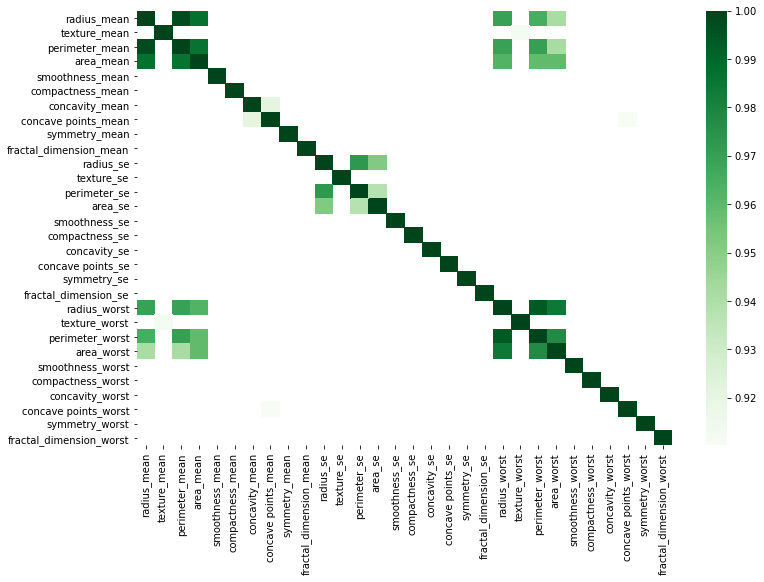

In [12]:
#plot heat map of the dataset 
plt.figure(figsize=(16,9))
kot = corr[corr>=.9]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens")
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)
 

In [13]:
#Create x and y variables
x = dataset.drop('diagnosis', axis=1).to_numpy()
y = dataset['diagnosis'].to_numpy()

#Create Train and Test Datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,stratify=y,random_state = 100) 

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train)
x_test2 = sc.transform(x_test)

In [14]:
#Script for SVM and NB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('SVM', SVC(kernel='linear',random_state=100)),
                    ('Naive Bayes',GaussianNB())]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    target_names=['fractal_dimension_worst','diagnosis']
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict,target_names=target_names))    


Estimator: SVM
[[70  2]
 [ 3 39]]
                         precision    recall  f1-score   support

fractal_dimension_worst       0.96      0.97      0.97        72
              diagnosis       0.95      0.93      0.94        42

               accuracy                           0.96       114
              macro avg       0.96      0.95      0.95       114
           weighted avg       0.96      0.96      0.96       114


Estimator: Naive Bayes
[[70  2]
 [ 3 39]]
                         precision    recall  f1-score   support

fractal_dimension_worst       0.96      0.97      0.97        72
              diagnosis       0.95      0.93      0.94        42

               accuracy                           0.96       114
              macro avg       0.96      0.95      0.95       114
           weighted avg       0.96      0.96      0.96       114



Text(91.68, 0.5, 'Predicted')

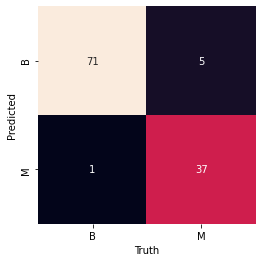

In [15]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(X_train, y_train)

# Predict Output 
pred = model.predict(X_test)

# Plot Confusion Matrix
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')